In [1]:
import numpy
from matplotlib import pyplot

In [2]:
numpy.set_printoptions(precision=3) # Trunca em 3 casas decimais

In [3]:
# Não existe a possibilidade de grades infinitas então, limitou-se a 100 de tamanho. dx é cada subintervalo.
# x_grid é justamente cada numeração de 1 à 100 multiplicado pelo subintervalo.

L = 1.
J = 100
dx = float(L)/float(J-1)
x_grid = numpy.array([j*dx for j in range(J)])

In [18]:
# 100 segundos

T = 100
N = 1000
dt = float(T)/float(N-1)
t_grid = numpy.array([n*dt for n in range(N)])

In [29]:
import numpy as np

h = 1.0545718e-34
m = 1
xs = np.linspace(0, 1e-32, 100)
delta_x = np.abs(xs[1]-xs[0])
delta_t = 1e-37

a = h**2/(4*m*delta_x**2)
print(a)
for n in range(len(xs)-1):
    b = (complex(0,1)*h/delta_t - 2*a - 1/4*(m*np.pi**2*xs[n]**2))
    print(b)
    
for n in range(len(xs)-1):
    c = (complex(0,1)*h/delta_t + 2*a + 1/4*(m*np.pi**2*xs[n]**2))
    print(c)

0.2724976149740676
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+1054.5718j)
(-0.5449952299481352+105

In [48]:
D = numpy.diagflat([a for i in range(J-1)], -1) +\
      numpy.diagflat([b.real]+[b.real for i in range(J-2)]+[b.real]) +\
      numpy.diagflat([a for i in range(J-1)], 1)

print(D)

[[-0.545  0.272  0.    ...  0.     0.     0.   ]
 [ 0.272 -0.545  0.272 ...  0.     0.     0.   ]
 [ 0.     0.272 -0.545 ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ... -0.545  0.272  0.   ]
 [ 0.     0.     0.    ...  0.272 -0.545  0.272]
 [ 0.     0.     0.    ...  0.     0.272 -0.545]]


In [50]:
R = numpy.diagflat([-a for i in range(J-1)], -1) +\
      numpy.diagflat([c.real]+[c.real for i in range(J-2)]+[c.real]) +\
      numpy.diagflat([-a for i in range(J-1)], 1)

print(R)

[[ 0.545 -0.272  0.    ...  0.     0.     0.   ]
 [-0.272  0.545 -0.272 ...  0.     0.     0.   ]
 [ 0.    -0.272  0.545 ...  0.     0.     0.   ]
 ...
 [ 0.     0.     0.    ...  0.545 -0.272  0.   ]
 [ 0.     0.     0.    ... -0.272  0.545 -0.272]
 [ 0.     0.     0.    ...  0.    -0.272  0.545]]


In [51]:
no_high = 10
U =  numpy.array([0.1 for i in range(no_high,J)] + [2. for i in range(0,no_high)])

In [53]:
U_record = []

U_record.append(U)

for ti in range(1,N):
    U_new = numpy.linalg.solve(D, R.dot(U))
    
    U = U_new
    
    U_record.append(U)

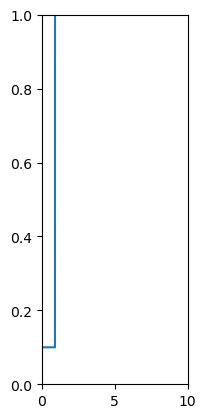

In [60]:
import matplotlib.pyplot as plt

ax1 = plt.subplot(131)
ax1.scatter([1, 2], [3, 4])
ax1.set_xlim([0, 10])
ax1.set_ylim([0, 1])

plt.plot(x_grid, U)
plt.show()